In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

plt.rcParams["figure.figsize"] = (10,8)

## Task 1

In [2]:
data = {'Улица': [80, 98, 75, 91, 78],
        'Гараж': [100, 82, 105, 89, 102]}
df = pd.DataFrame(data,
                  index=['Понедельник', 'Вторник', 'Среда', 'Четврег', 'Пятница'])
df

,Улица,Гараж
Понедельник,80,100
Вторник,98,82
Среда,75,105
Четврег,91,89
Пятница,78,102


In [3]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Улица,Гараж
Улица,1.000000,-1.000000
Гараж,-1.000000,1.000000


## Task 2

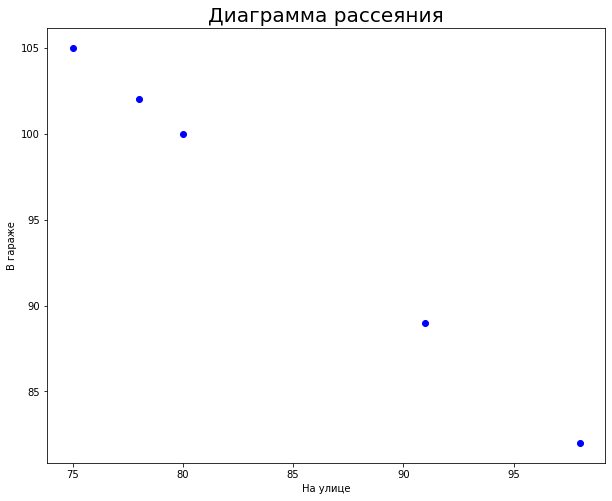

In [4]:
plt.title('Диаграмма рассеяния', fontsize=20)
plt.xlabel('На улице')
plt.ylabel('В гараже')
plt.scatter(df['Улица'], df['Гараж'], color='blue')
plt.show()

## Task 3

In [5]:
df_bitcoin = pd.read_csv('bitcoin.csv', index_col=0)
df_bitcoin

,time,high,low,open,volumefrom,volumeto,close
0,2015-12-20,462.76,431.10,461.20,121531.64,5.431648e+07,441.78
1,2015-12-21,445.54,423.99,441.78,121990.88,5.327022e+07,437.59
2,2015-12-22,443.22,433.25,437.59,65785.54,2.884554e+07,437.03
3,2015-12-23,444.78,434.28,437.03,63247.04,2.787735e+07,442.43
4,2015-12-24,460.62,441.76,442.43,79604.01,3.609666e+07,452.98
...,...,...,...,...,...,...,...
1996,2021-06-07,36790.39,33367.12,35798.57,52209.55,1.850311e+09,33582.86
1997,2021-06-08,34061.09,31034.35,33582.86,88483.79,2.890313e+09,33409.38
1998,2021-06-09,37528.42,32435.18,33409.38,92280.57,3.249554e+09,37391.58
1999,2021-06-10,38387.20,35821.05,37391.58,63052.49,2.338112e+09,36680.78


In [6]:
df_bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2001 entries, 0 to 2000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        2001 non-null   object 
 1   high        2001 non-null   float64
 2   low         2001 non-null   float64
 3   open        2001 non-null   float64
 4   volumefrom  2001 non-null   float64
 5   volumeto    2001 non-null   float64
 6   close       2001 non-null   float64
dtypes: float64(6), object(1)
memory usage: 125.1+ KB


In [7]:
df_bitcoin.describe()

,high,low,open,volumefrom,volumeto,close
count,2001.000000,2001.00000,2001.000000,2001.000000,2.001000e+03,2001.000000
mean,9676.696462,9053.13932,9382.567321,67879.827936,6.200236e+08,9400.737911
std,12789.382358,11880.38559,12372.864718,50970.461471,9.370947e+08,12386.471353
min,375.890000,350.39000,368.020000,9355.130000,7.377922e+06,368.020000
25%,1496.390000,1424.05000,1445.930000,34044.180000,1.052839e+08,1485.550000
50%,6839.600000,6545.41000,6707.460000,52271.640000,3.079266e+08,6708.960000
75%,10123.940000,9577.84000,9846.440000,84630.560000,6.577121e+08,9845.900000
max,64859.810000,62038.33000,63558.480000,495883.240000,1.112022e+10,63558.480000


In [8]:
corr_bitcoin = df_bitcoin.corr()
corr_bitcoin.style.background_gradient(cmap='coolwarm')

,high,low,open,volumefrom,volumeto,close
high,1.000000,0.998530,0.999310,-0.013605,0.779295,0.999308
low,0.998530,1.000000,0.998628,-0.040343,0.749349,0.999119
open,0.999310,0.998628,1.000000,-0.021620,0.771869,0.998420
volumefrom,-0.013605,-0.040343,-0.021620,1.000000,0.419676,-0.025332
volumeto,0.779295,0.749349,0.771869,0.419676,1.000000,0.766647
close,0.999308,0.999119,0.998420,-0.025332,0.766647,1.000000


## Task 4

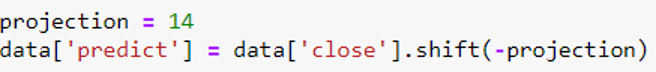

In [9]:
df_bitcoin['close']

0         441.78
1         437.59
2         437.03
3         442.43
4         452.98
          ...   
1996    33582.86
1997    33409.38
1998    37391.58
1999    36680.78
2000    36843.33
Name: close, Length: 2001, dtype: float64

## Task 5

In [10]:
projection = 14
df_bitcoin['predict'] = df_bitcoin['close'].shift(-projection)

X = df_bitcoin[['close']]
y = df_bitcoin[['predict']]

## Task 6

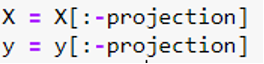

In [11]:
X = X[:-projection]
y = y[:-projection]

## Task 7

In [12]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

## Task 8 

In [ ]:
m = model.coef_[0]
b = model.intercept_
print(m, b)

## Task 9

In [ ]:
X_test = df_bitcoin[['close']][-projection:]
y_pred = model.predict(X_test)
y_pred

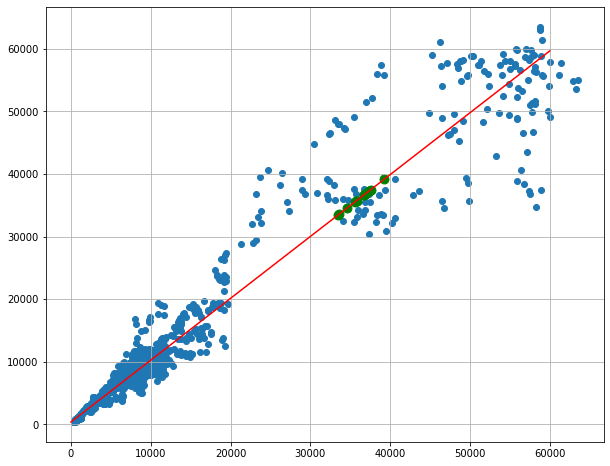

In [15]:
x = np.linspace(1, 60000, num=10000)
plt.plot(x, m * x + b, color='red')
plt.scatter(X, y)
plt.scatter(X_test, y_pred, color='green', s=80, marker='o')
plt.grid()

## Task 10

In [16]:
model.score(X, y)

0.9490624388820347

## Task 8

In [85]:
df_house = pd.read_csv('housePrice.csv')
df_house

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [86]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [87]:
df_house.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


## Task 9

In [88]:
df_house.isna().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [89]:
df_house[df_house['Address'].isna() == True]

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
43,60,2,True,True,True,NaN,2.650000e+09,88333.33
662,85,2,True,True,True,NaN,1.955000e+09,65166.67
706,117,2,True,True,True,NaN,6.500000e+09,216666.67
1108,77,2,True,True,False,NaN,2.020000e+09,67333.33
1109,71,1,True,True,True,NaN,2.300000e+09,76666.67
1577,100,2,True,True,True,NaN,3.100000e+09,103333.33
1796,70,2,True,True,True,NaN,4.830000e+09,161000.00
2071,94,2,True,True,True,NaN,3.000000e+09,100000.00
2072,99,2,True,True,True,NaN,4.150000e+09,138333.33
2127,63,1,True,True,False,NaN,7.300000e+08,24333.33


In [107]:
df_house_cleaned = df_house.dropna()

In [108]:
df_house_cleaned[df_house_cleaned["Area"].str.contains(",") == True]

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
570,"3,310,000,000",2,True,True,True,Ostad Moein,3.310000e+09,110333.33
709,"16,160,000,000",3,True,True,True,Pasdaran,1.616000e+10,538666.67
807,"1,000",2,True,True,False,Damavand,7.000000e+09,233333.33
1604,"8,400,000,000",2,True,True,True,Gheitarieh,8.700000e+09,290000.00
2171,"3,600",2,False,False,False,Shahryar,9.720000e+09,324000.00
2802,"2,550,000,000",2,True,True,True,Central Janatabad,2.550000e+09,85000.00


In [109]:
df_house_cleaned = df_house_cleaned[df_house_cleaned["Area"].str.contains(",") == False]


In [110]:
df_house_cleaned['Area'] = df_house_cleaned['Area'].astype(int)

In [113]:
df_house_cleaned['Area'].value_counts()

75     111
100    103
90      95
60      94
105     92
      ... 
177      1
257      1
287      1
929      1
166      1
Name: Area, Length: 237, dtype: int64

In [116]:
#df_house_cleaned = df_house_cleaned[df_house_cleaned['Area'] < 400]

df_house_cleaned = df_house_cleaned.drop_duplicates()
df_house_cleaned = df_house_cleaned.reset_index(drop=True)
df_house_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3242 non-null   int64  
 1   Room        3242 non-null   int64  
 2   Parking     3242 non-null   bool   
 3   Warehouse   3242 non-null   bool   
 4   Elevator    3242 non-null   bool   
 5   Address     3242 non-null   object 
 6   Price       3242 non-null   float64
 7   Price(USD)  3242 non-null   float64
dtypes: bool(3), float64(2), int64(2), object(1)
memory usage: 136.3+ KB


In [117]:
from sklearn.model_selection import train_test_split

In [146]:
df = df_house_cleaned[['Area', 'Price(USD)']]
df = df.rename(columns = {'Area': 'X', 'Price(USD)': 'y'}) 
df.head()

,X,y
0,63,61666.67
1,60,61666.67
2,79,18333.33
3,95,30083.33
4,123,233333.33


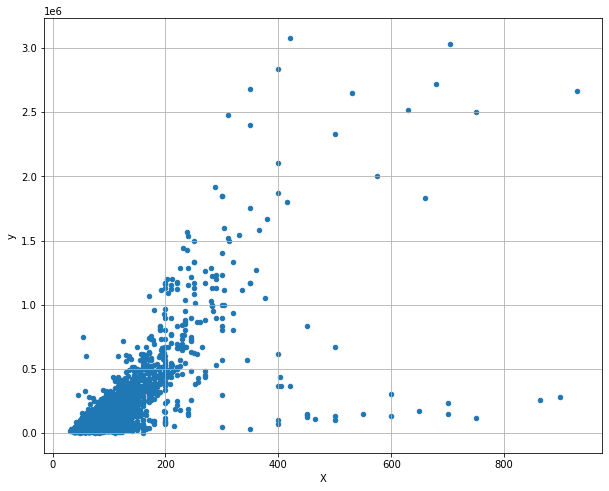

In [147]:
df.plot(x='X', y='y', kind='scatter', grid=True);

In [209]:
X_train, X_test, y_train, y_test = train_test_split(df['X'].to_numpy(), df['y'].to_numpy() / 100, test_size=0.25, random_state=42)
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_train.mean()) / X_train.std()

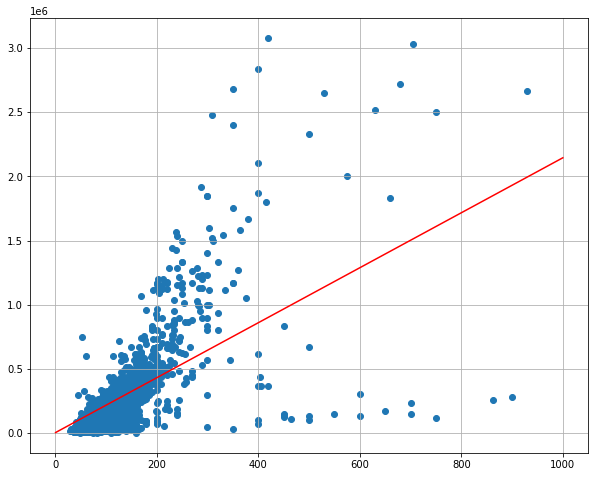

In [210]:
model = LinearRegression()
model.fit(X_train.reshape(-1, 1), y_train)

x = np.linspace(1, 1000, num=1000)
plt.plot(x, model.coef_ * x + model.intercept_, color='red')
plt.scatter(df['X'], df['y'])
plt.grid()

In [211]:
model.coef_, model.intercept_

(array([2142.6832322]), 1788.8726933772107)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['X'].to_numpy(), df['y'].to_numpy() / 100, test_size=0.25, random_state=42)
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_train.mean()) / X_train.std()

In [212]:
m, b = 1, 1
n = 1000
y_pred = m * X_train + b
lr = 0.01

for i in range(n):
    m -= lr * (2 * (y_pred - y_train) * X_train).mean()
    b -= lr * (2 * (y_pred - y_train)).mean()

    y_pred = m * X_train + b
    mse = (y_pred - y_train)**2
    
    if i % 100 == 0:
        print(mse.mean())

10934703.67819833
3591097.619234957
3461938.6679764553
3459667.02723807
3459627.073742056
3459626.3710421007
3459626.358683052
3459626.358465682
3459626.3584618587
3459626.358461791


In [213]:
m, b

(2142.6832285918526, 1788.8726903682793)

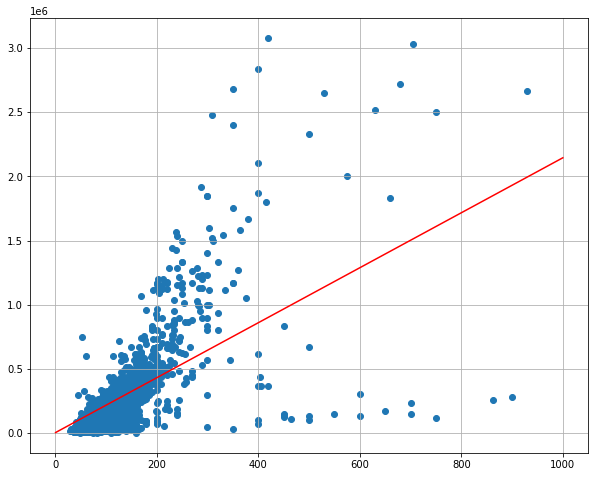

In [215]:
x = np.linspace(1, 1000, num=1000)
plt.plot(x, m * x + b, color='red')
plt.scatter(df['X'], df['y'])
plt.scatter()
plt.grid()